In [16]:
import diagram
import numpy as np
import scipy.io as sio
import scipy.optimize as sciopt
import matplotlib.pyplot as plt
import os
from numba import jit
import glob
import cProfile
%matplotlib inline
#import munkres

In [9]:
glob.glob("./*.mat")

['./Class1_Sample1.mat', './Class1_Sample2.mat', './Class2_Sample1.mat']

In [2]:
dict_vert, edges = diagram.read_mesh_graph("test_obj", 3)

In [2]:
def read_closed_shapes(directory):
    """
    This requires glob and scipy.io as sio
    """
    query = directory + "*.mat"
    files = glob.glob(query)
    shapes = []
    for file in files:
        vertices = sio.loadmat(file)['x']
        N = vertices.shape[0]
        edges = np.zeros((N,2))
        edges[N-1,:] = np.array([N, 1])
        for i in range(N-1):
            edges[i,:] = np.array([i+1,i+2])
        shapes.append([vertices, edges])
    return shapes
    
    

In [4]:
bell1 = read_closed_shapes("./")

In [6]:
%%time
diagram.scaled_distance(bell1, diagram.sample_circle(3).T)

Beginning to calculate distances
Calculating distance between 0 and 0
Considering shift:  0
Calculating finite distance for 0


ValueError: Cannot type empty list

In [14]:
bell2 = [[bell1[0][0][:100,:], bell1[0][1][:99,:]]]
len(bell1[0][0])

375

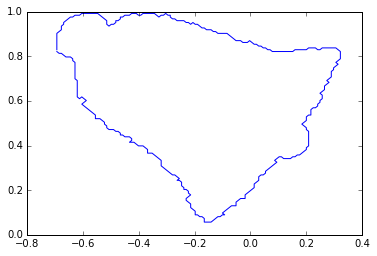

In [12]:
plt.plot(bell1[0][0][:,0],bell1[0][0][:,1])

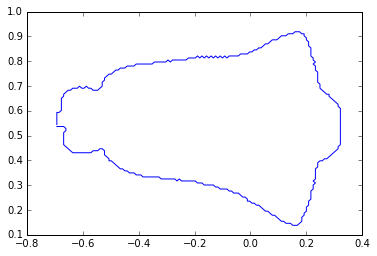

In [13]:
plt.plot(bell1[1][0][:,0],bell1[1][0][:,1])

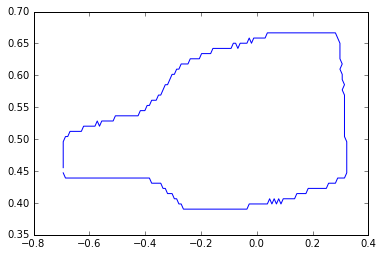

In [14]:
plt.plot(bell1[2][0][:,0],bell1[2][0][:,1])

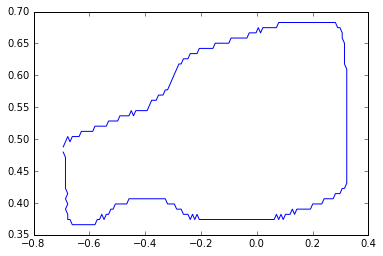

In [15]:
plt.plot(bell1[3][0][:,0],bell1[3][0][:,1])

In [5]:
list_heights, dict_heights, dict_neig = diagram.direction_order(dict_vert, edges, direction)

In [7]:
test_diagram = diagram.make_diagram(list_heights, dict_heights, dict_neig, infinity=100)

In [289]:
print(dict_heights)
2 in dict_neig[1]
res = new_diagram(dict_heights, dict_neig)
print(res.points)
print(res.infpoints)

{1: -1.0, 2: 0.0, 3: 1.0, 4: 0.0, 5: 0.0, 6: 1.0, 7: -1.0}
here
[(1, -1.0), (7, -1.0), (2, 0.0), (4, 0.0), (5, 0.0), (3, 1.0), (6, 1.0)]
vertex:  1
root:  1
self root
vertex:  7
root:  7
self root
vertex:  2
root:  1
has lower neighbor, dies immediately
vertex:  4
root:  4
self root
vertex:  5
root:  7
has lower neighbor, dies immediately
vertex:  3
root:  1
has lower neighbor, dies immediately
vertex:  6
root:  7
has lower neighbor, dies immediately
[(0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0)]
[-1.0, 0.0, -1.0]


In [219]:
class Tree:
    def __init__(self, name):
        self.parent = self
        self.rank = 0
        self.name = name
    def change_parent(self, new_parent):
        self.parent = new_parent

def Find(x):
    if x.parent != x:
        x.parent = Find(x.parent)
    return x.parent
        
def Union(x, y):
    x_root = Find(x)
    y_root = Find(y)
    if x_root == y_root:
        return None
    elif x_root.rank < y_root.rank:
        x_root.parent = y_root
    elif x_root.rank > y_root.rank:
        y_root.parent = x_root
    else:
        y_root.parent = x_root
        x_root.rank += 1
        
def height_Union(x, y, dict_heights):
    x_root = Find(x)
    y_root = Find(y)
    if x_root == y_root:
        return None
    if dict_heights[x_root.name] < dict_heights[y_root.name]:
        y_root.parent = x_root
    elif dict_heights[x_root.name] == dict_heights[y_root.name]:
        if x.name < y.name:
            y_root.parent = x_root
        else:
            x_root.parent = y_root
    else:
        x_root.parent = y_root
    

        

In [2]:
dict_vert1, edges1 = diagram.read_mesh_graph("test_obj", 3)
direction = [-1,1]
list_heights, dict_heights, dict_neig = diagram.direction_order(dict_vert1, edges1, direction)
res1 = diagram.make_diagram(dict_heights, dict_neig)

In [3]:
dict_vert2, edges2 = diagram.read_mesh_graph("test_obj2", 3)
direction = [-1,1]
list_heights, dict_heights, dict_neig = diagram.direction_order(dict_vert2, edges2, direction)
res2 = diagram.make_diagram(dict_heights, dict_neig)

In [10]:
directions = diagram.sample_circle(500)

In [11]:
diagram.pairwise_distances([[dict_vert1, edges1],[dict_vert2, edges2]], directions)

array([[ 0.        ,  1.85553048],
       [ 1.85553048,  0.        ]])

In [21]:
print(res1.infpoints)
print(res2.infpoints)

[-2.0]
[-3.0]


In [22]:
print(res1.points)
print(res2.points)

[(2.0, 2.0), (0.0, 0.0), (0.0, 0.0)]
[(-1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (-2.0, -2.0), (-2.0, -2.0), (-3.0, -3.0)]


In [367]:
dict_heights

{1: -1.0, 2: 0.0, 3: 2.0, 4: 2.0, 5: 3.0, 6: 4.0, 7: 1.0}

In [368]:
diag = new_diagram(dict_heights, dict_neig)

[(1, -1.0), (7, 1.0)]
current height: -1.0
Current vertex:  1
Its root: 1
1 is not own root? False
current height: 0.0
Current vertex:  1
Its root: 1
1 is not own root? False
current height: 1.0
Current vertex:  1
Its root: 1
1 is not own root? False
Current vertex:  7
Its root: 7
7 is not own root? False
current height: 2.0
Current vertex:  1
Its root: 1
1 is not own root? False
Current vertex:  7
Its root: 7
7 is not own root? False
current height: 3.0
Current vertex:  1
Its root: 1
1 is not own root? False
Current vertex:  7
Its root: 1
7 is not own root? True
7 no longer own root
current height: 4.0
Current vertex:  1
Its root: 1
1 is not own root? False


In [354]:
def new_diagram(dict_heights, dict_neighbors):
    dict_trees = {v : Tree(v) for v in dict_heights.keys()}
    vertices = set(dict_heights.keys())
    heights = set(dict_heights.values())
    heights_sorted = sorted(list(heights))
    dict_below_h = {h: [] for h in heights}
    for h in heights:
        for v in vertices:
            if dict_heights[v] <= h:
                dict_below_h[h].append(v)
    dict_deaths = {v: None for v in dict_heights.keys()}
    dead = set()
    for v in vertices:
        if len(dict_neighbors[v]) != 0:
            dict_deaths.update({v: dict_heights[v]})
            dead.add(v)
    alive = vertices.difference(dead)
    pairs = [(key, value) for key, value in dict_heights.items() if key in alive]
    pairs.sort(key = lambda x: x[1])
    print(pairs)
    for h in heights_sorted:
        print("current height:", h)
        died = set()
        for v in dict_below_h[h]:
            for neigh in dict_neighbors[v]:
                height_Union(dict_trees[v], dict_trees[neigh], dict_heights)
        for v in alive:
            if dict_heights[v] <= h:
                print("Current vertex: ", v)
                print("Its root:", Find(dict_trees[v]).name)
                own_root = v != Find(dict_trees[v]).name
                print(v, "is not own root?", own_root)
                if own_root:
                    print(v, "no longer own root")
                    died.add(v)
                    dict_deaths.update({v: h}) 
        alive = alive.difference(died)
    diag = diagram.Diagram()
    for v in dict_heights.keys():
        if dict_deaths[v] == None:
            diag.addinfpt(dict_heights[v])
        else:
            diag.addpt((dict_heights[v], dict_deaths[v]))
            
            
    return diag        

{1: -1.0, 2: 0.0, 3: 2.0, 4: 2.0, 5: 3.0, 6: 4.0, 7: 1.0}
[(1, -1.0), (7, 1.0)]
current height: -1.0
Current vertex:  1
Its root: 1
1 is not own root? False
current height: 0.0
Current vertex:  1
Its root: 1
1 is not own root? False
current height: 1.0
Current vertex:  1
Its root: 1
1 is not own root? False
Current vertex:  7
Its root: 7
7 is not own root? False
current height: 2.0
Current vertex:  1
Its root: 1
1 is not own root? False
Current vertex:  7
Its root: 7
7 is not own root? False
current height: 3.0
Current vertex:  1
Its root: 1
1 is not own root? False
Current vertex:  7
Its root: 1
7 is not own root? True
7 no longer own root
current height: 4.0
Current vertex:  1
Its root: 1
1 is not own root? False
[(0.0, 0.0), (2.0, 2.0), (2.0, 2.0), (3.0, 3.0), (4.0, 4.0), (1.0, 3.0)]
[-1.0]


In [35]:
matrix_dir = np.array([[1,0,-1,0],[0,1,0,-1]])
print(matrix_dir)
matrix_points = np.array([[2,2],[-1,1],[1,-1],[-1,-1]])
print(matrix_points)
res = matrix_points.dot(matrix_dir)
lambdas = res.min(axis = 0)
print(lambdas)
u = matrix_dir.dot(lambdas)
print(u)
matrix_points - u[np.newaxis, :]
lambdas.sum()

[[ 1  0 -1  0]
 [ 0  1  0 -1]]
[[ 2  2]
 [-1  1]
 [ 1 -1]
 [-1 -1]]
[-1 -1 -2 -2]
[1 1]


-6

In [37]:
xs = [1,2,3,4,5]
shift = 3
for x in range(5):
    print((x + 2)% 5)
print(xs)

2
3
4
0
1
[1, 2, 3, 4, 5]


In [38]:
def scaled_distance(list_matrices, matrix_dir):
    # first center each object
    K = 0
    # can change this to broadcasting
    k = matrix_dir.shape[1]
    for i in range(k):
        K += np.cos(2*np.pi*i/k)**2
    for obj in len(list_matrices):
        obj = list_matrices[i]
        prod = obj.dot(matrix_dir)
        # minimum of each column is lambda_i
        lambdas = prod.min(axis = 0)
        u = (1/K)*matrix_dir.dot(lambdas)
        list_matrices[i] -= u[np.newaxis,:]
        L = -lambdas.sum()
        list_matrices[i] /= L
    l_diagrams = []
    for shape in list_matrices:
        shape_diagrams = []
        for direction in matrix_dir:
            l_heights, d_heights, d_n = direction_order(shape[0], 
                                                       shape[1],
                                                       direction)
            shape_diagram = make_diagram(d_heights, d_n)
            shape_diagrams.append(shape_diagram)
        l_diagrams.append(shape_diagrams)
    N = len(list_matrices)
    dist_mat = np.zeros((N,N))
    for i in range(N):
        for j in range(i,N):
            list_dists = []
            for shift in range(k):
                finite_dist = 0
                infinite_dist = 0
                for cur in range(k):
                    finite_dist += finite_pt_dist(l_diagrams[i][cur],
                                                 l_diagrams[j][(cur + shift) % k],
                                                 1)
                    infinite_dist += inf_pt_dist(l_diagrams[i][cur],
                                                 l_diagrams[j][(cur + shift) % k],
                                                 1)                
                list_dists.append(finite_dist + infinite_dist)
            actual_dist = min(list_dists)
            dist_mat[i,j] += actual_dist/k
    dist_mat += dist_mat.T
    return dist_mat
        
        
        

In [23]:

for shift in range(5):
    for cur in range(5):
        print("current j", (cur + shift) %5)
        

current j 0
current j 1
current j 2
current j 3
current j 4
current j 1
current j 2
current j 3
current j 4
current j 0
current j 2
current j 3
current j 4
current j 0
current j 1
current j 3
current j 4
current j 0
current j 1
current j 2
current j 4
current j 0
current j 1
current j 2
current j 3


In [34]:
!pip install --upgrade scipy.optimize

  Could not find a version that satisfies the requirement scipy.optimize (from versions: )
No matching distribution found for scipy.optimize


In [7]:
np.log(abs(np.cos(0)))-np.log(abs(np.cos(np.pi/12)))

0.03466823209753693

In [10]:
print(np.tan(np.pi/12)/2)
print(np.tan(np.pi/24))

0.133974596216
0.131652497587


In [29]:
points1 = np.random.random((300,2))
points2 = np.random.random((200,2))

In [30]:
@jit
def make_dist_mat(points1,points2):
    n = len(points1)
    m = len(points2)
    dist_mat = np.zeros((n+m,n+m))
    for i in range(n):
        for j in range(m):
            # distance from point i in diagram 1 to point j in diagram 2
            dist_mat[i,j] += diagram.L1dist(points1[i],points2[j])
        # distance from point i of diagram 1 to diagonal
        dist_to_diag = diagram.diag_len(points1[i])
        dist_mat[i, m:][np.newaxis,:] += dist_to_diag*np.ones((1,n))
    # now we consider the m copies of the diagonal
    for j in range(m):
        # the distance from the diagonal to point j of diagram 2
        dist_to_diag = diagram.diag_len(points2[j])
        dist_mat[n:,j][:,np.newaxis] += dist_to_diag*np.ones((m,1))
    
    row_ind, col_ind = sciopt.linear_sum_assignment(dist_mat)
    total_dist = 0
    for i in range(len(row_ind)):
        total_dist += dist_mat[row_ind[i],col_ind[i]]
    
    return total_dist

In [34]:
%%time
test = make_dist_mat(points1,points2)
print(test)

-63.79989054235447
CPU times: user 21.9 s, sys: 61.5 ms, total: 22 s
Wall time: 22.1 s


In [41]:
sciopt.linear_sum_assignment(test)

ValueError: expected a matrix (2-d array), got a () array

In [32]:
make_dist_mat(np.random.random((10,2)), np.random.random((10,2)))
diagram1 = diagram.Diagram()
diagram1.points = points1
diagram2 = diagram.Diagram()
diagram2.points = points2

In [35]:
%%time
diagram.finite_pt_dist(diagram1, diagram2, 1)

CPU times: user 20.6 s, sys: 47.6 ms, total: 20.7 s
Wall time: 20.7 s


-63.79989054235447